In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [2]:
pth = r"/Users/christianugwu/Downloads/Aqua_Data_Clarias.xlsx"

In [3]:
ras_data = pd.read_excel(pth, sheet_name='RAS')

In [4]:
ras_data.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
0,5.11,27.4,7.03,17.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,11.93148
1,5.02,22.1,7.05,40.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,34.93148
2,5.21,22.6,7.14,68.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,62.93148
3,5.11,22.7,7.12,106.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,99.93148
4,5.21,22.3,7.04,125.93150,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,117.93150


In [5]:
ras_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dissolve_oxygen   39 non-null     float64
 1   Temperature       39 non-null     float64
 2   PH                39 non-null     float64
 3   Feed_intake       39 non-null     float64
 4   Fish_meal         39 non-null     float64
 5   Blood_meal        39 non-null     float64
 6   Palm_kernel_cake  39 non-null     int64  
 7   Water_fern        39 non-null     int64  
 8   Wheat_meal        39 non-null     int64  
 9   Mopane_worm       39 non-null     int64  
 10  Soya_bean_meal    39 non-null     float64
 11  Yellow_maize      39 non-null     float64
 12  Soya_bean_oil     39 non-null     int64  
 13  Starch            39 non-null     int64  
 14  Vitamin           39 non-null     int64  
 15  Methionine        39 non-null     int64  
 16  Lysine            39 non-null     int64  
 17 

In [6]:
ras_data.describe()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000
mean,5.055385,23.048718,7.067179,409.912024,3.633333,10.833333,4.333333,3.000000,6.333333,6.666667,16.600000,25.300000,5.333333,2.0,2.0,3.333333,3.333333,7.300000,272.065870
std,0.309727,1.280393,0.046507,865.253165,5.205480,15.520925,6.208370,4.298102,9.073772,9.551339,13.568617,0.894721,0.477567,0.0,0.0,2.387835,2.387835,10.458716,218.027199
min,4.510000,21.700000,7.010000,17.931480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,11.931480
25%,4.715000,22.400000,7.030000,107.005740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,100.005740
50%,5.140000,22.700000,7.050000,202.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,5.000000,2.0,2.0,5.000000,5.000000,0.000000,194.630000
75%,5.325000,22.900000,7.120000,517.488350,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,501.216700
max,5.480000,27.400000,7.140000,5502.053300,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,666.053300


In [7]:
def boxplot(column):
    sns.boxplot(data=ras_data,x= ras_data[f"{column}"])
    plt.title(f"Boxplot of Concrete Data {column}")
    plt.show()

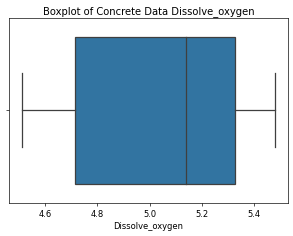

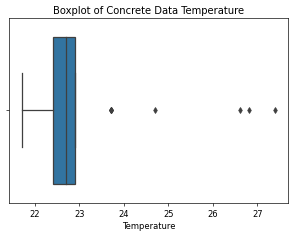

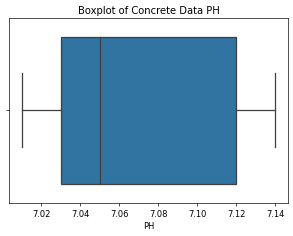

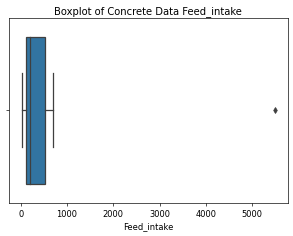

In [8]:
boxplot('Dissolve_oxygen')
boxplot('Temperature')
boxplot('PH')
boxplot('Feed_intake')

In [9]:
# Given that the dataset is skewed to the right, identifing the upper limit to remove outliers
IQR = np.percentile(ras_data["Temperature"],75) - np.percentile(ras_data["Temperature"],25)
Upper_Limit = np.percentile(ras_data["Temperature"],75) + 1.5*IQR
Upper_Limit

23.65

In [10]:
#This operation replaces all the outliers with 23.65 for Temperature
ras_data.loc[ras_data["Temperature"] > 23.65,"Temperature"] = 23.65

<Axes: >

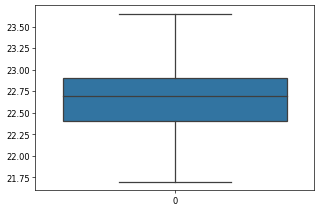

In [11]:
sns.boxplot(ras_data["Temperature"])

In [12]:
# Given that the dataset is skewed to the right, identifing the upper limit to remove outliers
IQR1 = np.percentile(ras_data["Feed_intake"],75) - np.percentile(ras_data["Temperature"],25)
Upper_Limit = np.percentile(ras_data["Feed_intake"],75) + 1.5*IQR1
Upper_Limit

1260.120875

In [13]:
#This operation replaces all the outliers with 1260.120875 for Feed Intake
ras_data.loc[ras_data["Feed_intake"] > 1260.120875,"Feed_intake"] = 1260.120875

<Axes: >

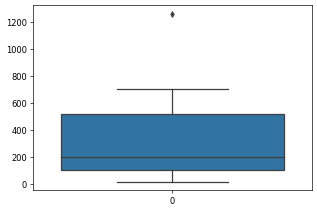

In [14]:
sns.boxplot(ras_data["Feed_intake"])

In [15]:
def histgram(column):
    sns.histplot(data = ras_data,x = ras_data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of Concrete Data {column}")
    plt.show()

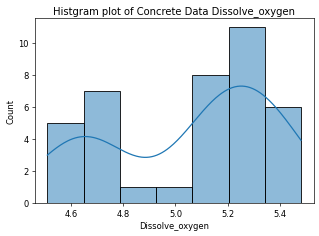

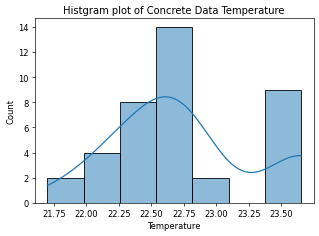

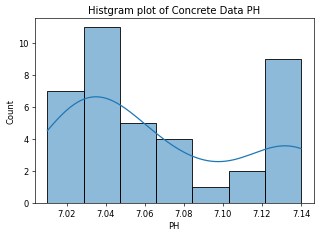

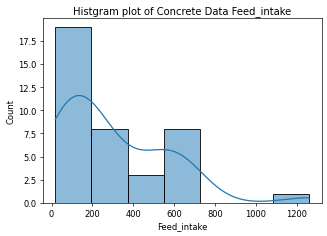

In [16]:
histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')
histgram('Feed_intake')

In [17]:
# skewness along the index axis 
ras_data.skew(axis = 0, skipna = True) 

Dissolve_oxygen    -0.499036
Temperature         0.460255
PH                  0.541403
Feed_intake         1.379308
Fish_meal           0.735711
Blood_meal          0.735711
Palm_kernel_cake    0.735711
Water_fern          0.735711
Wheat_meal          0.735711
Mopane_worm         0.735711
Soya_bean_meal     -0.046582
Yellow_maize        0.489357
Soya_bean_oil       0.735711
Starch              0.000000
Vitamin             0.000000
Methionine         -0.735711
Lysine             -0.735711
Groundnut_cake      0.735711
Weight_gain         0.517197
dtype: float64

In [18]:
# Calculate the correlation matrix
correlation_matrix = ras_data.corr()
correlation_matrix

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
Dissolve_oxygen,1.000000,0.090846,0.051323,0.059465,0.352264,0.578211,0.578211,0.578211,-0.930475,-0.930475,-0.150071,0.350125,0.352264,NaN,NaN,-0.352264,-0.352264,0.352264,0.037197
Temperature,0.090846,1.000000,-0.096662,0.149538,0.155919,-0.085345,-0.085345,-0.085345,-0.070574,-0.070574,0.137772,-0.118265,0.155919,NaN,NaN,-0.155919,-0.155919,0.155919,0.195209
PH,0.051323,-0.096662,1.000000,-0.365621,0.138233,-0.051344,-0.051344,-0.051344,-0.086889,-0.086889,0.107593,-0.085378,0.138233,NaN,NaN,-0.138233,-0.138233,0.138233,-0.340652
Feed_intake,0.059465,0.149538,-0.365621,1.000000,-0.094937,0.111532,0.111532,0.111532,-0.016595,-0.016595,-0.119529,0.119702,-0.094937,NaN,NaN,0.094937,0.094937,-0.094937,0.912306
Fish_meal,0.352264,0.155919,0.138233,-0.094937,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.855273,-0.720577,1.000000,NaN,NaN,-1.000000,-1.000000,1.000000,-0.059909
Blood_meal,0.578211,-0.085345,-0.051344,0.111532,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.032221
Palm_kernel_cake,0.578211,-0.085345,-0.051344,0.111532,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.032221
Water_fern,0.578211,-0.085345,-0.051344,0.111532,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.032221
Wheat_meal,-0.930475,-0.070574,-0.086889,-0.016595,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.027688
Mopane_worm,-0.930475,-0.070574,-0.086889,-0.016595,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.027688


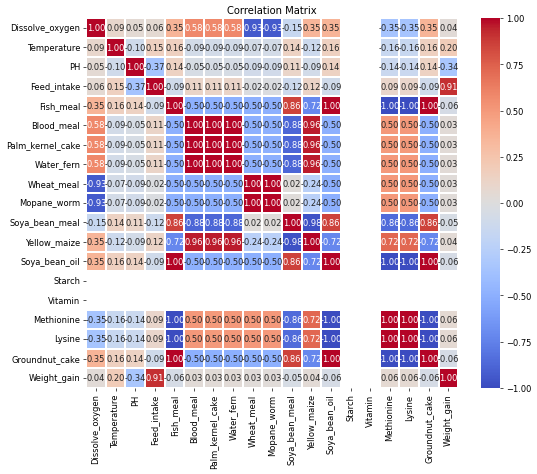

In [19]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix') 
# displaying heatmap 
plt.show() 

### Descriptive Analysis Inference
1. The highest weight gain is 666.05.
2. The lowest weight gain is 11.93.
3. The total number of observations is 39 with no missing value.
4. Most of the weight fall in the range of 0 to 100.
5. Average weight is 272.07
6. The temperature ranges from 21.70 to 27.4.
7. Most of the temperature fall in the range of 26.4 and 26.7.
8. There is high correlation between weight_gain and feed intake which is 0.9997.
10. The highest feed intake was 696.455556 and the lowest was 24.353333
11. Average dissolve oxygen was 5.09, the highest was 6.02 and lowest was 4.18

### Predictive Analysis

In [20]:
features = ras_data.drop(['Weight_gain'], axis =1)
features.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake
0,5.11,23.65,7.03,17.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
1,5.02,22.10,7.05,40.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
2,5.21,22.60,7.14,68.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
3,5.11,22.70,7.12,106.93148,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
4,5.21,22.30,7.04,125.93150,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9


In [21]:
label = ras_data[['Weight_gain']]
label.head()

,Weight_gain
0,11.93148
1,34.93148
2,62.93148
3,99.93148
4,117.93150


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42) 

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (31, 18)
X_test dimension (8, 18)
y_train dimension (31, 1)
y_test dimension (8, 1)


In [23]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,Weight_gain
33,240.6300
36,563.2600
4,117.9315
13,12.1500
30,118.0800
26,12.0800
6,188.1200
27,35.0800


#### Linear Regression

In [24]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
# Train the Linear regression model
model_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model_reg.predict(X_test)

In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {model_reg.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[ 1.19612785e+02  3.55037423e+01  8.06321293e+01  6.96584317e-01
  -4.77920325e-01 -1.34637445e+00 -5.38549780e-01 -3.72842156e-01
   1.62018334e+00  1.70545615e+00  1.14921637e-02 -3.58328185e-02
  -4.38459014e-02  0.00000000e+00  0.00000000e+00  2.19229507e-01
   2.19229507e-01 -9.60225240e-01]]
Mean Squared Error: 3621.032054750779
R-squared: 0.8755529938828507


In [27]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Linear Regression Prediction
0     240.6300                    248.850334
1     563.2600                    543.674543
2     117.9315                    135.958560
3      12.1500                    100.296846
4     118.0800                    173.249805
5      12.0800                    137.414105
6     188.1200                    203.881796
7      35.0800                     72.782409


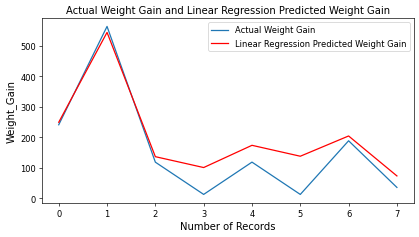

In [28]:
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Linear Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual Weight Gain','Linear Regression Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [29]:
# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=30)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 283.14000255504993
R-squared: 0.9902690931488031


In [30]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = regressor.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'Descision Tree Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Descision Tree Regressor Prediction
0     240.6300                            241.41000
1     563.2600                            538.26000
2     117.9315                            118.15000
3      12.1500                             35.15000
4     118.0800                            118.15000
5      12.0800                             35.15000
6     188.1200                            194.63000
7      35.0800                             11.93148


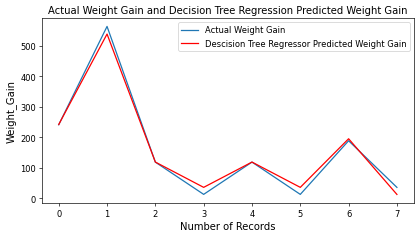

In [31]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Decision Tree Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Descision Tree Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','Descision Tree Regressor Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [32]:
# Create and train the K-Nearest Neighbors Regression model
knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 367.7808784233539
R-squared: 0.9873601701020921


In [33]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = knn_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'KNN Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  KNN Regressor Prediction
0     240.6300                207.930000
1     563.2600                562.560000
2     117.9315                111.004892
3      12.1500                 41.648592
4     118.0800                118.478296
5      12.0800                 41.604888
6     188.1200                194.434300
7      35.0800                 41.604888


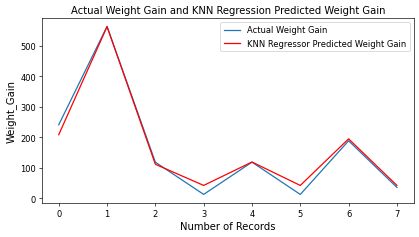

In [34]:
# visualize result of KNN Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and KNN Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['KNN Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','KNN Regressor Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [35]:
import warnings
warnings.filterwarnings("ignore")
# Create and train the MLP Regression model
ann_reg = MLPRegressor(hidden_layer_sizes= (50,), random_state=42,
                       alpha = 0.0005, activation = 'relu', 
                       solver = 'adam', max_iter= 10000)

ann_reg.fit(X_train, y_train)

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50,), max_iter=10000,
             random_state=42)

In [36]:
# Make predictions on the test set
y_pred = ann_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.402971598489442
R-squared: 0.9998486794302933


In [37]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= ann_reg.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= ann_reg.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error for Training:  10.351515423454403
mean_squared_error for Testing:  2.098325903783643


In [38]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = ann_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  ANN Prediction
0     240.6300      239.360445
1     563.2600      566.987399
2     117.9315      116.537753
3      12.1500        9.380246
4     118.0800      119.047340
5      12.0800       10.064982
6     188.1200      185.932801
7      35.0800       35.649694


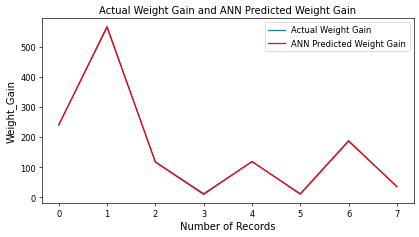

In [39]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [40]:
# Save
import pickle
pickle_out = open("ANN_Clarias_RAS_ext.pkl","wb")
pickle.dump(ann_reg, pickle_out)
pickle_out.close()

In [36]:
from keras.models import Sequential
from keras.layers import Dense# Neural network
def get_ANN():
    model = Sequential()
    model.add(Dense(500, input_dim=4, activation= "relu"))
    model.add(Dense(100, activation= "relu"))
    model.add(Dense(50, activation= "relu"))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    return model

In [37]:
model = get_ANN()
history = model.fit(X_train, y_train, batch_size = 1, validation_split=0.2, epochs= 3000)
model.fit(X_train, y_train, batch_size = 1, validation_split=0.2, epochs= 3000)

Epoch 1/3000
24/24 [==============================] - 0s 4ms/step - loss: 31809.8848 - mean_squared_error: 31809.8848 - val_loss: 94137.5469 - val_mean_squared_error: 94137.5469
Epoch 2/3000
24/24 [==============================] - 0s 1ms/step - loss: 906.5545 - mean_squared_error: 906.5545 - val_loss: 61911.3203 - val_mean_squared_error: 61911.3203
Epoch 3/3000
24/24 [==============================] - 0s 1ms/step - loss: 499.9820 - mean_squared_error: 499.9820 - val_loss: 73305.1641 - val_mean_squared_error: 73305.1641
Epoch 4/3000
24/24 [==============================] - 0s 1ms/step - loss: 499.4910 - mean_squared_error: 499.4910 - val_loss: 64447.9336 - val_mean_squared_error: 64447.9336
Epoch 5/3000
24/24 [==============================] - 0s 1ms/step - loss: 1350.9543 - mean_squared_error: 1350.9543 - val_loss: 65436.3086 - val_mean_squared_error: 65436.3086
Epoch 6/3000
24/24 [==============================] - 0s 1ms/step - loss: 464.7348 - mean_squared_error: 464.7348 - val_loss

Epoch 48/3000
24/24 [==============================] - 0s 1ms/step - loss: 2044.0381 - mean_squared_error: 2044.0381 - val_loss: 76451.7578 - val_mean_squared_error: 76451.7578
Epoch 49/3000
24/24 [==============================] - 0s 1ms/step - loss: 638.5612 - mean_squared_error: 638.5612 - val_loss: 64038.1211 - val_mean_squared_error: 64038.1211
Epoch 50/3000
24/24 [==============================] - 0s 1ms/step - loss: 555.0623 - mean_squared_error: 555.0623 - val_loss: 43394.0859 - val_mean_squared_error: 43394.0859
Epoch 51/3000
24/24 [==============================] - 0s 1ms/step - loss: 351.6553 - mean_squared_error: 351.6553 - val_loss: 65423.9258 - val_mean_squared_error: 65423.9258
Epoch 52/3000
24/24 [==============================] - 0s 1ms/step - loss: 585.5123 - mean_squared_error: 585.5123 - val_loss: 85529.2344 - val_mean_squared_error: 85529.2344
Epoch 53/3000
24/24 [==============================] - 0s 1ms/step - loss: 1308.7740 - mean_squared_error: 1308.7740 - val_

Epoch 95/3000
24/24 [==============================] - 0s 1ms/step - loss: 601.2781 - mean_squared_error: 601.2781 - val_loss: 66270.2500 - val_mean_squared_error: 66270.2500
Epoch 96/3000
24/24 [==============================] - 0s 1ms/step - loss: 1017.4523 - mean_squared_error: 1017.4523 - val_loss: 71155.3125 - val_mean_squared_error: 71155.3125
Epoch 97/3000
24/24 [==============================] - 0s 1ms/step - loss: 532.8055 - mean_squared_error: 532.8055 - val_loss: 60167.0117 - val_mean_squared_error: 60167.0117
Epoch 98/3000
24/24 [==============================] - 0s 1ms/step - loss: 704.5523 - mean_squared_error: 704.5523 - val_loss: 67044.3047 - val_mean_squared_error: 67044.3047
Epoch 99/3000
24/24 [==============================] - 0s 1ms/step - loss: 496.6266 - mean_squared_error: 496.6266 - val_loss: 67236.6172 - val_mean_squared_error: 67236.6172
Epoch 100/3000
24/24 [==============================] - 0s 1ms/step - loss: 498.3291 - mean_squared_error: 498.3291 - val_l

24/24 [==============================] - 0s 1ms/step - loss: 823.3973 - mean_squared_error: 823.3973 - val_loss: 44921.1055 - val_mean_squared_error: 44921.1055
Epoch 188/3000
24/24 [==============================] - 0s 1ms/step - loss: 546.2095 - mean_squared_error: 546.2095 - val_loss: 60595.1250 - val_mean_squared_error: 60595.1250
Epoch 189/3000
24/24 [==============================] - 0s 1ms/step - loss: 431.2629 - mean_squared_error: 431.2629 - val_loss: 68891.0781 - val_mean_squared_error: 68891.0781
Epoch 190/3000
24/24 [==============================] - 0s 1ms/step - loss: 605.7556 - mean_squared_error: 605.7556 - val_loss: 53714.6875 - val_mean_squared_error: 53714.6875
Epoch 191/3000
24/24 [==============================] - 0s 1ms/step - loss: 1161.6360 - mean_squared_error: 1161.6360 - val_loss: 51187.5547 - val_mean_squared_error: 51187.5547
Epoch 192/3000
24/24 [==============================] - 0s 1ms/step - loss: 597.7778 - mean_squared_error: 597.7778 - val_loss: 51625

24/24 [==============================] - 0s 1ms/step - loss: 723.1133 - mean_squared_error: 723.1133 - val_loss: 71867.6328 - val_mean_squared_error: 71867.6328
Epoch 280/3000
24/24 [==============================] - 0s 1ms/step - loss: 802.6287 - mean_squared_error: 802.6287 - val_loss: 61963.7227 - val_mean_squared_error: 61963.7227
Epoch 281/3000
24/24 [==============================] - 0s 1ms/step - loss: 585.6478 - mean_squared_error: 585.6478 - val_loss: 53680.8555 - val_mean_squared_error: 53680.8555
Epoch 282/3000
24/24 [==============================] - 0s 1ms/step - loss: 552.7205 - mean_squared_error: 552.7205 - val_loss: 66864.2969 - val_mean_squared_error: 66864.2969
Epoch 283/3000
24/24 [==============================] - 0s 1ms/step - loss: 769.1546 - mean_squared_error: 769.1546 - val_loss: 58363.2422 - val_mean_squared_error: 58363.2422
Epoch 284/3000
24/24 [==============================] - 0s 1ms/step - loss: 656.7266 - mean_squared_error: 656.7266 - val_loss: 56065.9

24/24 [==============================] - 0s 1ms/step - loss: 513.2609 - mean_squared_error: 513.2609 - val_loss: 53272.6133 - val_mean_squared_error: 53272.6133
Epoch 372/3000
24/24 [==============================] - 0s 1ms/step - loss: 435.2464 - mean_squared_error: 435.2464 - val_loss: 49589.1680 - val_mean_squared_error: 49589.1680
Epoch 373/3000
24/24 [==============================] - 0s 1ms/step - loss: 363.5760 - mean_squared_error: 363.5760 - val_loss: 44456.2383 - val_mean_squared_error: 44456.2383
Epoch 374/3000
24/24 [==============================] - 0s 1ms/step - loss: 1451.5326 - mean_squared_error: 1451.5326 - val_loss: 73233.1016 - val_mean_squared_error: 73233.1016
Epoch 375/3000
24/24 [==============================] - 0s 1ms/step - loss: 1407.0514 - mean_squared_error: 1407.0514 - val_loss: 74405.3203 - val_mean_squared_error: 74405.3203
Epoch 376/3000
24/24 [==============================] - 0s 1ms/step - loss: 643.9326 - mean_squared_error: 643.9326 - val_loss: 469

24/24 [==============================] - 0s 1ms/step - loss: 439.9336 - mean_squared_error: 439.9336 - val_loss: 52718.5273 - val_mean_squared_error: 52718.5273
Epoch 464/3000
24/24 [==============================] - 0s 1ms/step - loss: 500.1873 - mean_squared_error: 500.1873 - val_loss: 67472.7812 - val_mean_squared_error: 67472.7812
Epoch 465/3000
24/24 [==============================] - 0s 1ms/step - loss: 373.2697 - mean_squared_error: 373.2697 - val_loss: 49247.4062 - val_mean_squared_error: 49247.4062
Epoch 466/3000
24/24 [==============================] - 0s 1ms/step - loss: 906.8252 - mean_squared_error: 906.8252 - val_loss: 63522.5078 - val_mean_squared_error: 63522.5078
Epoch 467/3000
24/24 [==============================] - 0s 1ms/step - loss: 716.5941 - mean_squared_error: 716.5941 - val_loss: 45116.1602 - val_mean_squared_error: 45116.1602
Epoch 468/3000
24/24 [==============================] - 0s 1ms/step - loss: 473.6178 - mean_squared_error: 473.6178 - val_loss: 50937.8

24/24 [==============================] - 0s 1ms/step - loss: 869.8337 - mean_squared_error: 869.8337 - val_loss: 52024.5000 - val_mean_squared_error: 52024.5000
Epoch 556/3000
24/24 [==============================] - 0s 1ms/step - loss: 281.5255 - mean_squared_error: 281.5255 - val_loss: 52062.6016 - val_mean_squared_error: 52062.6016
Epoch 557/3000
24/24 [==============================] - 0s 1ms/step - loss: 339.5012 - mean_squared_error: 339.5012 - val_loss: 49478.6680 - val_mean_squared_error: 49478.6680
Epoch 558/3000
24/24 [==============================] - 0s 1ms/step - loss: 889.2923 - mean_squared_error: 889.2923 - val_loss: 52015.9883 - val_mean_squared_error: 52015.9883
Epoch 559/3000
24/24 [==============================] - 0s 1ms/step - loss: 447.1394 - mean_squared_error: 447.1394 - val_loss: 61465.2852 - val_mean_squared_error: 61465.2852
Epoch 560/3000
24/24 [==============================] - 0s 1ms/step - loss: 482.8971 - mean_squared_error: 482.8971 - val_loss: 60435.4

Epoch 648/3000
24/24 [==============================] - 0s 1ms/step - loss: 531.5734 - mean_squared_error: 531.5734 - val_loss: 56629.2109 - val_mean_squared_error: 56629.2109
Epoch 649/3000
24/24 [==============================] - 0s 1ms/step - loss: 475.1732 - mean_squared_error: 475.1732 - val_loss: 55084.3633 - val_mean_squared_error: 55084.3633
Epoch 650/3000
24/24 [==============================] - 0s 1ms/step - loss: 789.9702 - mean_squared_error: 789.9702 - val_loss: 60634.2422 - val_mean_squared_error: 60634.2422
Epoch 651/3000
24/24 [==============================] - 0s 1ms/step - loss: 1010.0898 - mean_squared_error: 1010.0898 - val_loss: 55527.7227 - val_mean_squared_error: 55527.7227
Epoch 652/3000
24/24 [==============================] - 0s 1ms/step - loss: 1221.4296 - mean_squared_error: 1221.4296 - val_loss: 44428.8398 - val_mean_squared_error: 44428.8398
Epoch 653/3000
24/24 [==============================] - 0s 1ms/step - loss: 471.3190 - mean_squared_error: 471.3190 

24/24 [==============================] - 0s 1ms/step - loss: 438.5055 - mean_squared_error: 438.5055 - val_loss: 54592.4883 - val_mean_squared_error: 54592.4883
Epoch 741/3000
24/24 [==============================] - 0s 1ms/step - loss: 598.9539 - mean_squared_error: 598.9539 - val_loss: 44069.9258 - val_mean_squared_error: 44069.9258
Epoch 742/3000
24/24 [==============================] - 0s 1ms/step - loss: 507.0599 - mean_squared_error: 507.0599 - val_loss: 45837.1875 - val_mean_squared_error: 45837.1875
Epoch 743/3000
24/24 [==============================] - 0s 1ms/step - loss: 366.6771 - mean_squared_error: 366.6771 - val_loss: 56758.3516 - val_mean_squared_error: 56758.3516
Epoch 744/3000
24/24 [==============================] - 0s 1ms/step - loss: 387.2560 - mean_squared_error: 387.2560 - val_loss: 47289.2227 - val_mean_squared_error: 47289.2227
Epoch 745/3000
24/24 [==============================] - 0s 1ms/step - loss: 584.7044 - mean_squared_error: 584.7044 - val_loss: 58478.4

Epoch 787/3000
24/24 [==============================] - 0s 1ms/step - loss: 1753.0728 - mean_squared_error: 1753.0728 - val_loss: 62415.6016 - val_mean_squared_error: 62415.6016
Epoch 788/3000
24/24 [==============================] - 0s 1ms/step - loss: 649.0550 - mean_squared_error: 649.0550 - val_loss: 44900.3320 - val_mean_squared_error: 44900.3320
Epoch 789/3000
24/24 [==============================] - 0s 1ms/step - loss: 549.6985 - mean_squared_error: 549.6985 - val_loss: 47690.8125 - val_mean_squared_error: 47690.8125
Epoch 790/3000
24/24 [==============================] - 0s 1ms/step - loss: 372.6858 - mean_squared_error: 372.6858 - val_loss: 51208.3477 - val_mean_squared_error: 51208.3477
Epoch 791/3000
24/24 [==============================] - 0s 1ms/step - loss: 658.3160 - mean_squared_error: 658.3160 - val_loss: 51753.0977 - val_mean_squared_error: 51753.0977
Epoch 792/3000
24/24 [==============================] - 0s 1ms/step - loss: 421.8514 - mean_squared_error: 421.8514 - 

Epoch 880/3000
24/24 [==============================] - 0s 1ms/step - loss: 358.2423 - mean_squared_error: 358.2423 - val_loss: 54769.4297 - val_mean_squared_error: 54769.4297
Epoch 881/3000
24/24 [==============================] - 0s 1ms/step - loss: 516.7103 - mean_squared_error: 516.7103 - val_loss: 44002.4180 - val_mean_squared_error: 44002.4180
Epoch 882/3000
24/24 [==============================] - 0s 1ms/step - loss: 228.9978 - mean_squared_error: 228.9978 - val_loss: 52602.3242 - val_mean_squared_error: 52602.3242
Epoch 883/3000
24/24 [==============================] - 0s 1ms/step - loss: 383.2534 - mean_squared_error: 383.2534 - val_loss: 48120.6016 - val_mean_squared_error: 48120.6016
Epoch 884/3000
24/24 [==============================] - 0s 1ms/step - loss: 326.9052 - mean_squared_error: 326.9052 - val_loss: 51856.8789 - val_mean_squared_error: 51856.8789
Epoch 885/3000
24/24 [==============================] - 0s 1ms/step - loss: 379.0620 - mean_squared_error: 379.0620 - va

Epoch 973/3000
24/24 [==============================] - 0s 1ms/step - loss: 691.3435 - mean_squared_error: 691.3435 - val_loss: 38592.5195 - val_mean_squared_error: 38592.5195
Epoch 974/3000
24/24 [==============================] - 0s 1ms/step - loss: 539.3510 - mean_squared_error: 539.3510 - val_loss: 49448.4414 - val_mean_squared_error: 49448.4414
Epoch 975/3000
24/24 [==============================] - 0s 1ms/step - loss: 349.1994 - mean_squared_error: 349.1994 - val_loss: 48807.6641 - val_mean_squared_error: 48807.6641
Epoch 976/3000
24/24 [==============================] - 0s 1ms/step - loss: 531.3021 - mean_squared_error: 531.3021 - val_loss: 54836.4727 - val_mean_squared_error: 54836.4727
Epoch 977/3000
24/24 [==============================] - 0s 1ms/step - loss: 420.2963 - mean_squared_error: 420.2963 - val_loss: 46971.4883 - val_mean_squared_error: 46971.4883
Epoch 978/3000
24/24 [==============================] - 0s 1ms/step - loss: 317.9215 - mean_squared_error: 317.9215 - va

24/24 [==============================] - 0s 1ms/step - loss: 625.1399 - mean_squared_error: 625.1399 - val_loss: 50774.7305 - val_mean_squared_error: 50774.7305
Epoch 1066/3000
24/24 [==============================] - 0s 1ms/step - loss: 512.8101 - mean_squared_error: 512.8101 - val_loss: 53592.4375 - val_mean_squared_error: 53592.4375
Epoch 1067/3000
24/24 [==============================] - 0s 1ms/step - loss: 525.3500 - mean_squared_error: 525.3500 - val_loss: 44176.0977 - val_mean_squared_error: 44176.0977
Epoch 1068/3000
24/24 [==============================] - 0s 1ms/step - loss: 417.8878 - mean_squared_error: 417.8878 - val_loss: 39066.0391 - val_mean_squared_error: 39066.0391
Epoch 1069/3000
24/24 [==============================] - 0s 1ms/step - loss: 397.6339 - mean_squared_error: 397.6339 - val_loss: 50530.3633 - val_mean_squared_error: 50530.3633
Epoch 1070/3000
24/24 [==============================] - 0s 1ms/step - loss: 339.3952 - mean_squared_error: 339.3952 - val_loss: 44

24/24 [==============================] - 0s 1ms/step - loss: 433.0479 - mean_squared_error: 433.0479 - val_loss: 44727.3008 - val_mean_squared_error: 44727.3008
Epoch 1158/3000
24/24 [==============================] - 0s 1ms/step - loss: 424.3213 - mean_squared_error: 424.3213 - val_loss: 47740.9883 - val_mean_squared_error: 47740.9883
Epoch 1159/3000
24/24 [==============================] - 0s 1ms/step - loss: 350.8900 - mean_squared_error: 350.8900 - val_loss: 51873.2695 - val_mean_squared_error: 51873.2695
Epoch 1160/3000
24/24 [==============================] - 0s 1ms/step - loss: 702.1739 - mean_squared_error: 702.1739 - val_loss: 49647.5430 - val_mean_squared_error: 49647.5430
Epoch 1161/3000
24/24 [==============================] - 0s 1ms/step - loss: 385.0548 - mean_squared_error: 385.0548 - val_loss: 44141.2891 - val_mean_squared_error: 44141.2891
Epoch 1162/3000
24/24 [==============================] - 0s 1ms/step - loss: 400.2430 - mean_squared_error: 400.2430 - val_loss: 47

24/24 [==============================] - 0s 1ms/step - loss: 389.3970 - mean_squared_error: 389.3970 - val_loss: 45940.6602 - val_mean_squared_error: 45940.6602
Epoch 1250/3000
24/24 [==============================] - 0s 1ms/step - loss: 358.6837 - mean_squared_error: 358.6837 - val_loss: 56625.2617 - val_mean_squared_error: 56625.2617
Epoch 1251/3000
24/24 [==============================] - 0s 1ms/step - loss: 470.4227 - mean_squared_error: 470.4227 - val_loss: 43060.8086 - val_mean_squared_error: 43060.8086
Epoch 1252/3000
24/24 [==============================] - 0s 1ms/step - loss: 375.0236 - mean_squared_error: 375.0236 - val_loss: 42952.5977 - val_mean_squared_error: 42952.5977
Epoch 1253/3000
24/24 [==============================] - 0s 1ms/step - loss: 343.2906 - mean_squared_error: 343.2906 - val_loss: 54824.9062 - val_mean_squared_error: 54824.9062
Epoch 1254/3000
24/24 [==============================] - 0s 1ms/step - loss: 748.9731 - mean_squared_error: 748.9731 - val_loss: 50

24/24 [==============================] - 0s 1ms/step - loss: 579.3528 - mean_squared_error: 579.3528 - val_loss: 55255.2773 - val_mean_squared_error: 55255.2773
Epoch 1342/3000
24/24 [==============================] - 0s 1ms/step - loss: 607.4840 - mean_squared_error: 607.4840 - val_loss: 47594.8555 - val_mean_squared_error: 47594.8555
Epoch 1343/3000
24/24 [==============================] - 0s 1ms/step - loss: 407.4393 - mean_squared_error: 407.4393 - val_loss: 45321.1367 - val_mean_squared_error: 45321.1367
Epoch 1344/3000
24/24 [==============================] - 0s 1ms/step - loss: 391.3859 - mean_squared_error: 391.3859 - val_loss: 40970.3516 - val_mean_squared_error: 40970.3516
Epoch 1345/3000
24/24 [==============================] - 0s 1ms/step - loss: 455.7601 - mean_squared_error: 455.7601 - val_loss: 47309.9727 - val_mean_squared_error: 47309.9727
Epoch 1346/3000
24/24 [==============================] - 0s 1ms/step - loss: 584.6647 - mean_squared_error: 584.6647 - val_loss: 57

24/24 [==============================] - 0s 1ms/step - loss: 336.0403 - mean_squared_error: 336.0403 - val_loss: 45429.2734 - val_mean_squared_error: 45429.2734
Epoch 1434/3000
24/24 [==============================] - 0s 1ms/step - loss: 393.2657 - mean_squared_error: 393.2657 - val_loss: 47094.5508 - val_mean_squared_error: 47094.5508
Epoch 1435/3000
24/24 [==============================] - 0s 1ms/step - loss: 323.7710 - mean_squared_error: 323.7710 - val_loss: 47490.1562 - val_mean_squared_error: 47490.1562
Epoch 1436/3000
24/24 [==============================] - 0s 1ms/step - loss: 418.2404 - mean_squared_error: 418.2404 - val_loss: 46674.0586 - val_mean_squared_error: 46674.0586
Epoch 1437/3000
24/24 [==============================] - 0s 1ms/step - loss: 348.6227 - mean_squared_error: 348.6227 - val_loss: 49107.8438 - val_mean_squared_error: 49107.8438
Epoch 1438/3000
24/24 [==============================] - 0s 1ms/step - loss: 344.1902 - mean_squared_error: 344.1902 - val_loss: 39

24/24 [==============================] - 0s 1ms/step - loss: 658.6905 - mean_squared_error: 658.6905 - val_loss: 38896.5078 - val_mean_squared_error: 38896.5078
Epoch 1526/3000
24/24 [==============================] - 0s 1ms/step - loss: 477.0447 - mean_squared_error: 477.0447 - val_loss: 42083.7539 - val_mean_squared_error: 42083.7539
Epoch 1527/3000
24/24 [==============================] - 0s 1ms/step - loss: 496.8158 - mean_squared_error: 496.8158 - val_loss: 46215.6055 - val_mean_squared_error: 46215.6055
Epoch 1528/3000
24/24 [==============================] - 0s 1ms/step - loss: 308.4282 - mean_squared_error: 308.4282 - val_loss: 43294.5625 - val_mean_squared_error: 43294.5625
Epoch 1529/3000
24/24 [==============================] - 0s 1ms/step - loss: 413.2387 - mean_squared_error: 413.2387 - val_loss: 48488.4766 - val_mean_squared_error: 48488.4766
Epoch 1530/3000
24/24 [==============================] - 0s 1ms/step - loss: 436.8744 - mean_squared_error: 436.8744 - val_loss: 43

24/24 [==============================] - 0s 1ms/step - loss: 341.3797 - mean_squared_error: 341.3797 - val_loss: 40810.5312 - val_mean_squared_error: 40810.5312
Epoch 1618/3000
24/24 [==============================] - 0s 1ms/step - loss: 477.9992 - mean_squared_error: 477.9992 - val_loss: 47410.8164 - val_mean_squared_error: 47410.8164
Epoch 1619/3000
24/24 [==============================] - 0s 1ms/step - loss: 356.3054 - mean_squared_error: 356.3054 - val_loss: 50359.8359 - val_mean_squared_error: 50359.8359
Epoch 1620/3000
24/24 [==============================] - 0s 1ms/step - loss: 441.4760 - mean_squared_error: 441.4760 - val_loss: 38825.3516 - val_mean_squared_error: 38825.3516
Epoch 1621/3000
24/24 [==============================] - 0s 1ms/step - loss: 232.0599 - mean_squared_error: 232.0599 - val_loss: 49206.6445 - val_mean_squared_error: 49206.6445
Epoch 1622/3000
24/24 [==============================] - 0s 1ms/step - loss: 350.0768 - mean_squared_error: 350.0768 - val_loss: 41

24/24 [==============================] - 0s 1ms/step - loss: 614.4637 - mean_squared_error: 614.4637 - val_loss: 43425.5312 - val_mean_squared_error: 43425.5312
Epoch 1710/3000
24/24 [==============================] - 0s 1ms/step - loss: 582.4202 - mean_squared_error: 582.4202 - val_loss: 42091.3672 - val_mean_squared_error: 42091.3672
Epoch 1711/3000
24/24 [==============================] - 0s 1ms/step - loss: 384.1662 - mean_squared_error: 384.1662 - val_loss: 41481.8633 - val_mean_squared_error: 41481.8633
Epoch 1712/3000
24/24 [==============================] - 0s 1ms/step - loss: 795.3215 - mean_squared_error: 795.3215 - val_loss: 54500.1992 - val_mean_squared_error: 54500.1992
Epoch 1713/3000
24/24 [==============================] - 0s 1ms/step - loss: 451.4469 - mean_squared_error: 451.4469 - val_loss: 44395.8711 - val_mean_squared_error: 44395.8711
Epoch 1714/3000
24/24 [==============================] - 0s 1ms/step - loss: 283.8082 - mean_squared_error: 283.8082 - val_loss: 48

24/24 [==============================] - 0s 1ms/step - loss: 362.1655 - mean_squared_error: 362.1655 - val_loss: 47513.4492 - val_mean_squared_error: 47513.4492
Epoch 1802/3000
24/24 [==============================] - 0s 1ms/step - loss: 397.8540 - mean_squared_error: 397.8540 - val_loss: 45079.0273 - val_mean_squared_error: 45079.0273
Epoch 1803/3000
24/24 [==============================] - 0s 1ms/step - loss: 288.0999 - mean_squared_error: 288.0999 - val_loss: 41739.2891 - val_mean_squared_error: 41739.2891
Epoch 1804/3000
24/24 [==============================] - 0s 1ms/step - loss: 347.1046 - mean_squared_error: 347.1046 - val_loss: 44860.8711 - val_mean_squared_error: 44860.8711
Epoch 1805/3000
24/24 [==============================] - 0s 1ms/step - loss: 649.5162 - mean_squared_error: 649.5162 - val_loss: 50941.5859 - val_mean_squared_error: 50941.5859
Epoch 1806/3000
24/24 [==============================] - 0s 1ms/step - loss: 306.3003 - mean_squared_error: 306.3003 - val_loss: 41

24/24 [==============================] - 0s 1ms/step - loss: 503.8711 - mean_squared_error: 503.8711 - val_loss: 39126.1055 - val_mean_squared_error: 39126.1055
Epoch 1894/3000
24/24 [==============================] - 0s 1ms/step - loss: 911.3531 - mean_squared_error: 911.3531 - val_loss: 48875.3984 - val_mean_squared_error: 48875.3984
Epoch 1895/3000
24/24 [==============================] - 0s 1ms/step - loss: 579.1100 - mean_squared_error: 579.1100 - val_loss: 45826.7109 - val_mean_squared_error: 45826.7109
Epoch 1896/3000
24/24 [==============================] - 0s 1ms/step - loss: 699.9122 - mean_squared_error: 699.9122 - val_loss: 36109.9453 - val_mean_squared_error: 36109.9453
Epoch 1897/3000
24/24 [==============================] - 0s 1ms/step - loss: 464.9009 - mean_squared_error: 464.9009 - val_loss: 44340.1875 - val_mean_squared_error: 44340.1875
Epoch 1898/3000
24/24 [==============================] - 0s 1ms/step - loss: 406.6843 - mean_squared_error: 406.6843 - val_loss: 39

24/24 [==============================] - 0s 1ms/step - loss: 275.3156 - mean_squared_error: 275.3156 - val_loss: 42307.7305 - val_mean_squared_error: 42307.7305
Epoch 1986/3000
24/24 [==============================] - 0s 1ms/step - loss: 404.2540 - mean_squared_error: 404.2540 - val_loss: 37438.6328 - val_mean_squared_error: 37438.6328
Epoch 1987/3000
24/24 [==============================] - 0s 1ms/step - loss: 322.0650 - mean_squared_error: 322.0650 - val_loss: 44167.3086 - val_mean_squared_error: 44167.3086
Epoch 1988/3000
24/24 [==============================] - 0s 1ms/step - loss: 350.8079 - mean_squared_error: 350.8079 - val_loss: 46661.0078 - val_mean_squared_error: 46661.0078
Epoch 1989/3000
24/24 [==============================] - 0s 1ms/step - loss: 328.0388 - mean_squared_error: 328.0388 - val_loss: 40932.7812 - val_mean_squared_error: 40932.7812
Epoch 1990/3000
24/24 [==============================] - 0s 1ms/step - loss: 255.6944 - mean_squared_error: 255.6944 - val_loss: 48

24/24 [==============================] - 0s 1ms/step - loss: 279.1700 - mean_squared_error: 279.1700 - val_loss: 41554.5117 - val_mean_squared_error: 41554.5117
Epoch 2078/3000
24/24 [==============================] - 0s 1ms/step - loss: 305.8827 - mean_squared_error: 305.8827 - val_loss: 39581.4883 - val_mean_squared_error: 39581.4883
Epoch 2079/3000
24/24 [==============================] - 0s 1ms/step - loss: 360.5808 - mean_squared_error: 360.5808 - val_loss: 40997.8320 - val_mean_squared_error: 40997.8320
Epoch 2080/3000
24/24 [==============================] - 0s 1ms/step - loss: 284.9938 - mean_squared_error: 284.9938 - val_loss: 42101.6289 - val_mean_squared_error: 42101.6289
Epoch 2081/3000
24/24 [==============================] - 0s 1ms/step - loss: 486.6047 - mean_squared_error: 486.6047 - val_loss: 45989.3164 - val_mean_squared_error: 45989.3164
Epoch 2082/3000
24/24 [==============================] - 0s 1ms/step - loss: 716.9563 - mean_squared_error: 716.9563 - val_loss: 50

24/24 [==============================] - 0s 1ms/step - loss: 285.7306 - mean_squared_error: 285.7306 - val_loss: 43512.3477 - val_mean_squared_error: 43512.3477
Epoch 2170/3000
24/24 [==============================] - 0s 1ms/step - loss: 418.9077 - mean_squared_error: 418.9077 - val_loss: 38950.2500 - val_mean_squared_error: 38950.2500
Epoch 2171/3000
24/24 [==============================] - 0s 1ms/step - loss: 340.7856 - mean_squared_error: 340.7856 - val_loss: 50350.6445 - val_mean_squared_error: 50350.6445
Epoch 2172/3000
24/24 [==============================] - 0s 1ms/step - loss: 307.5412 - mean_squared_error: 307.5412 - val_loss: 40022.7266 - val_mean_squared_error: 40022.7266
Epoch 2173/3000
24/24 [==============================] - 0s 1ms/step - loss: 340.2238 - mean_squared_error: 340.2238 - val_loss: 49115.3516 - val_mean_squared_error: 49115.3516
Epoch 2174/3000
24/24 [==============================] - 0s 1ms/step - loss: 407.6070 - mean_squared_error: 407.6070 - val_loss: 38

24/24 [==============================] - 0s 1ms/step - loss: 311.1127 - mean_squared_error: 311.1127 - val_loss: 45051.2773 - val_mean_squared_error: 45051.2773
Epoch 2262/3000
24/24 [==============================] - 0s 1ms/step - loss: 575.6671 - mean_squared_error: 575.6671 - val_loss: 48862.7266 - val_mean_squared_error: 48862.7266
Epoch 2263/3000
24/24 [==============================] - 0s 1ms/step - loss: 441.4569 - mean_squared_error: 441.4569 - val_loss: 43708.2500 - val_mean_squared_error: 43708.2500
Epoch 2264/3000
24/24 [==============================] - 0s 1ms/step - loss: 291.7553 - mean_squared_error: 291.7553 - val_loss: 43124.6367 - val_mean_squared_error: 43124.6367
Epoch 2265/3000
24/24 [==============================] - 0s 1ms/step - loss: 356.1759 - mean_squared_error: 356.1759 - val_loss: 40759.3516 - val_mean_squared_error: 40759.3516
Epoch 2266/3000
24/24 [==============================] - 0s 1ms/step - loss: 684.6894 - mean_squared_error: 684.6894 - val_loss: 32

24/24 [==============================] - 0s 1ms/step - loss: 343.7376 - mean_squared_error: 343.7376 - val_loss: 43050.9688 - val_mean_squared_error: 43050.9688
Epoch 2354/3000
24/24 [==============================] - 0s 1ms/step - loss: 276.6528 - mean_squared_error: 276.6528 - val_loss: 38450.6523 - val_mean_squared_error: 38450.6523
Epoch 2355/3000
24/24 [==============================] - 0s 1ms/step - loss: 335.4059 - mean_squared_error: 335.4059 - val_loss: 45592.1055 - val_mean_squared_error: 45592.1055
Epoch 2356/3000
24/24 [==============================] - 0s 1ms/step - loss: 545.3798 - mean_squared_error: 545.3798 - val_loss: 36227.6094 - val_mean_squared_error: 36227.6094
Epoch 2357/3000
24/24 [==============================] - 0s 1ms/step - loss: 558.5823 - mean_squared_error: 558.5823 - val_loss: 36656.5430 - val_mean_squared_error: 36656.5430
Epoch 2358/3000
24/24 [==============================] - 0s 1ms/step - loss: 355.7355 - mean_squared_error: 355.7355 - val_loss: 40

24/24 [==============================] - 0s 1ms/step - loss: 314.0569 - mean_squared_error: 314.0569 - val_loss: 36527.0352 - val_mean_squared_error: 36527.0352
Epoch 2446/3000
24/24 [==============================] - 0s 1ms/step - loss: 455.2852 - mean_squared_error: 455.2852 - val_loss: 37219.4727 - val_mean_squared_error: 37219.4727
Epoch 2447/3000
24/24 [==============================] - 0s 1ms/step - loss: 382.8267 - mean_squared_error: 382.8267 - val_loss: 39051.1484 - val_mean_squared_error: 39051.1484
Epoch 2448/3000
24/24 [==============================] - 0s 1ms/step - loss: 482.0800 - mean_squared_error: 482.0800 - val_loss: 45074.3516 - val_mean_squared_error: 45074.3516
Epoch 2449/3000
24/24 [==============================] - 0s 1ms/step - loss: 832.0479 - mean_squared_error: 832.0479 - val_loss: 33279.4375 - val_mean_squared_error: 33279.4375
Epoch 2450/3000
24/24 [==============================] - 0s 1ms/step - loss: 343.4271 - mean_squared_error: 343.4271 - val_loss: 46

24/24 [==============================] - 0s 1ms/step - loss: 331.3729 - mean_squared_error: 331.3729 - val_loss: 39786.1953 - val_mean_squared_error: 39786.1953
Epoch 2538/3000
24/24 [==============================] - 0s 1ms/step - loss: 367.3649 - mean_squared_error: 367.3649 - val_loss: 36216.4688 - val_mean_squared_error: 36216.4688
Epoch 2539/3000
24/24 [==============================] - 0s 1ms/step - loss: 299.3613 - mean_squared_error: 299.3613 - val_loss: 43317.0234 - val_mean_squared_error: 43317.0234
Epoch 2540/3000
24/24 [==============================] - 0s 1ms/step - loss: 328.4082 - mean_squared_error: 328.4082 - val_loss: 41434.3008 - val_mean_squared_error: 41434.3008
Epoch 2541/3000
24/24 [==============================] - 0s 1ms/step - loss: 354.0204 - mean_squared_error: 354.0204 - val_loss: 35273.1914 - val_mean_squared_error: 35273.1914
Epoch 2542/3000
24/24 [==============================] - 0s 1ms/step - loss: 290.0604 - mean_squared_error: 290.0604 - val_loss: 46

24/24 [==============================] - 0s 1ms/step - loss: 474.0042 - mean_squared_error: 474.0042 - val_loss: 44303.6523 - val_mean_squared_error: 44303.6523
Epoch 2630/3000
24/24 [==============================] - 0s 1ms/step - loss: 294.1234 - mean_squared_error: 294.1234 - val_loss: 38549.3516 - val_mean_squared_error: 38549.3516
Epoch 2631/3000
24/24 [==============================] - 0s 1ms/step - loss: 284.9117 - mean_squared_error: 284.9117 - val_loss: 45674.4648 - val_mean_squared_error: 45674.4648
Epoch 2632/3000
24/24 [==============================] - 0s 1ms/step - loss: 320.2363 - mean_squared_error: 320.2363 - val_loss: 39794.9102 - val_mean_squared_error: 39794.9102
Epoch 2633/3000
24/24 [==============================] - 0s 1ms/step - loss: 379.0950 - mean_squared_error: 379.0950 - val_loss: 43359.9336 - val_mean_squared_error: 43359.9336
Epoch 2634/3000
24/24 [==============================] - 0s 1ms/step - loss: 304.9934 - mean_squared_error: 304.9934 - val_loss: 39

24/24 [==============================] - 0s 1ms/step - loss: 277.5587 - mean_squared_error: 277.5587 - val_loss: 36560.5195 - val_mean_squared_error: 36560.5195
Epoch 2722/3000
24/24 [==============================] - 0s 1ms/step - loss: 474.5664 - mean_squared_error: 474.5664 - val_loss: 42227.8945 - val_mean_squared_error: 42227.8945
Epoch 2723/3000
24/24 [==============================] - 0s 1ms/step - loss: 301.8428 - mean_squared_error: 301.8428 - val_loss: 40200.5117 - val_mean_squared_error: 40200.5117
Epoch 2724/3000
24/24 [==============================] - 0s 1ms/step - loss: 267.8360 - mean_squared_error: 267.8360 - val_loss: 41404.6172 - val_mean_squared_error: 41404.6172
Epoch 2725/3000
24/24 [==============================] - 0s 1ms/step - loss: 339.7797 - mean_squared_error: 339.7797 - val_loss: 35745.7539 - val_mean_squared_error: 35745.7539
Epoch 2726/3000
24/24 [==============================] - 0s 1ms/step - loss: 272.7010 - mean_squared_error: 272.7010 - val_loss: 42

24/24 [==============================] - 0s 1ms/step - loss: 540.7009 - mean_squared_error: 540.7009 - val_loss: 42213.7500 - val_mean_squared_error: 42213.7500
Epoch 2814/3000
24/24 [==============================] - 0s 1ms/step - loss: 330.5460 - mean_squared_error: 330.5460 - val_loss: 39539.4492 - val_mean_squared_error: 39539.4492
Epoch 2815/3000
24/24 [==============================] - 0s 1ms/step - loss: 332.9017 - mean_squared_error: 332.9017 - val_loss: 37805.1055 - val_mean_squared_error: 37805.1055
Epoch 2816/3000
24/24 [==============================] - 0s 1ms/step - loss: 333.4751 - mean_squared_error: 333.4751 - val_loss: 36237.6016 - val_mean_squared_error: 36237.6016
Epoch 2817/3000
24/24 [==============================] - 0s 1ms/step - loss: 329.0835 - mean_squared_error: 329.0835 - val_loss: 38399.6484 - val_mean_squared_error: 38399.6484
Epoch 2818/3000
24/24 [==============================] - 0s 1ms/step - loss: 297.7797 - mean_squared_error: 297.7797 - val_loss: 35

24/24 [==============================] - 0s 1ms/step - loss: 310.5215 - mean_squared_error: 310.5215 - val_loss: 35829.6562 - val_mean_squared_error: 35829.6562
Epoch 2906/3000
24/24 [==============================] - 0s 1ms/step - loss: 403.1154 - mean_squared_error: 403.1154 - val_loss: 43290.5312 - val_mean_squared_error: 43290.5312
Epoch 2907/3000
24/24 [==============================] - 0s 1ms/step - loss: 253.9016 - mean_squared_error: 253.9016 - val_loss: 37618.8438 - val_mean_squared_error: 37618.8438
Epoch 2908/3000
24/24 [==============================] - 0s 1ms/step - loss: 357.7117 - mean_squared_error: 357.7117 - val_loss: 41920.0195 - val_mean_squared_error: 41920.0195
Epoch 2909/3000
24/24 [==============================] - 0s 1ms/step - loss: 339.2310 - mean_squared_error: 339.2310 - val_loss: 40686.8203 - val_mean_squared_error: 40686.8203
Epoch 2910/3000
24/24 [==============================] - 0s 1ms/step - loss: 344.0959 - mean_squared_error: 344.0959 - val_loss: 41

24/24 [==============================] - 0s 1ms/step - loss: 476.7745 - mean_squared_error: 476.7745 - val_loss: 43091.5586 - val_mean_squared_error: 43091.5586
Epoch 2998/3000
24/24 [==============================] - 0s 1ms/step - loss: 382.1248 - mean_squared_error: 382.1248 - val_loss: 40520.2422 - val_mean_squared_error: 40520.2422
Epoch 2999/3000
24/24 [==============================] - 0s 1ms/step - loss: 525.9907 - mean_squared_error: 525.9907 - val_loss: 36891.3398 - val_mean_squared_error: 36891.3398
Epoch 3000/3000
24/24 [==============================] - 0s 1ms/step - loss: 348.5074 - mean_squared_error: 348.5074 - val_loss: 43703.3516 - val_mean_squared_error: 43703.3516
Epoch 1/3000
24/24 [==============================] - 0s 2ms/step - loss: 277.0283 - mean_squared_error: 277.0283 - val_loss: 37650.3633 - val_mean_squared_error: 37650.3633
Epoch 2/3000
24/24 [==============================] - 0s 1ms/step - loss: 285.2533 - mean_squared_error: 285.2533 - val_loss: 37655.09

Epoch 44/3000
24/24 [==============================] - 0s 2ms/step - loss: 349.6122 - mean_squared_error: 349.6122 - val_loss: 37032.2734 - val_mean_squared_error: 37032.2734
Epoch 45/3000
24/24 [==============================] - 0s 1ms/step - loss: 320.5884 - mean_squared_error: 320.5884 - val_loss: 37517.3750 - val_mean_squared_error: 37517.3750
Epoch 46/3000
24/24 [==============================] - 0s 1ms/step - loss: 286.1566 - mean_squared_error: 286.1566 - val_loss: 41341.6211 - val_mean_squared_error: 41341.6211
Epoch 47/3000
24/24 [==============================] - 0s 1ms/step - loss: 300.5633 - mean_squared_error: 300.5633 - val_loss: 37811.6523 - val_mean_squared_error: 37811.6523
Epoch 48/3000
24/24 [==============================] - 0s 1ms/step - loss: 322.0276 - mean_squared_error: 322.0276 - val_loss: 37680.5312 - val_mean_squared_error: 37680.5312
Epoch 49/3000
24/24 [==============================] - 0s 1ms/step - loss: 315.2062 - mean_squared_error: 315.2062 - val_loss

Epoch 91/3000
24/24 [==============================] - 0s 1ms/step - loss: 324.2762 - mean_squared_error: 324.2762 - val_loss: 39173.8672 - val_mean_squared_error: 39173.8672
Epoch 92/3000
24/24 [==============================] - 0s 1ms/step - loss: 276.0072 - mean_squared_error: 276.0072 - val_loss: 38843.3398 - val_mean_squared_error: 38843.3398
Epoch 93/3000
24/24 [==============================] - 0s 1ms/step - loss: 367.0669 - mean_squared_error: 367.0669 - val_loss: 36472.3555 - val_mean_squared_error: 36472.3555
Epoch 94/3000
24/24 [==============================] - 0s 1ms/step - loss: 318.7348 - mean_squared_error: 318.7348 - val_loss: 37136.5430 - val_mean_squared_error: 37136.5430
Epoch 95/3000
24/24 [==============================] - 0s 1ms/step - loss: 286.9777 - mean_squared_error: 286.9777 - val_loss: 40037.9453 - val_mean_squared_error: 40037.9453
Epoch 96/3000
24/24 [==============================] - 0s 1ms/step - loss: 292.6438 - mean_squared_error: 292.6438 - val_loss

Epoch 184/3000
24/24 [==============================] - 0s 1ms/step - loss: 299.0131 - mean_squared_error: 299.0131 - val_loss: 37946.4961 - val_mean_squared_error: 37946.4961
Epoch 185/3000
24/24 [==============================] - 0s 1ms/step - loss: 279.7370 - mean_squared_error: 279.7370 - val_loss: 39653.9258 - val_mean_squared_error: 39653.9258
Epoch 186/3000
24/24 [==============================] - 0s 1ms/step - loss: 296.4149 - mean_squared_error: 296.4149 - val_loss: 39092.7539 - val_mean_squared_error: 39092.7539
Epoch 187/3000
24/24 [==============================] - 0s 1ms/step - loss: 361.0070 - mean_squared_error: 361.0070 - val_loss: 41747.3555 - val_mean_squared_error: 41747.3555
Epoch 188/3000
24/24 [==============================] - 0s 1ms/step - loss: 367.1855 - mean_squared_error: 367.1855 - val_loss: 39995.0625 - val_mean_squared_error: 39995.0625
Epoch 189/3000
24/24 [==============================] - 0s 1ms/step - loss: 302.2734 - mean_squared_error: 302.2734 - va

Epoch 277/3000
24/24 [==============================] - 0s 1ms/step - loss: 292.9211 - mean_squared_error: 292.9211 - val_loss: 40179.8008 - val_mean_squared_error: 40179.8008
Epoch 278/3000
24/24 [==============================] - 0s 1ms/step - loss: 305.8304 - mean_squared_error: 305.8304 - val_loss: 38324.0859 - val_mean_squared_error: 38324.0859
Epoch 279/3000
24/24 [==============================] - 0s 1ms/step - loss: 262.7290 - mean_squared_error: 262.7290 - val_loss: 39457.7617 - val_mean_squared_error: 39457.7617
Epoch 280/3000
24/24 [==============================] - 0s 1ms/step - loss: 361.3723 - mean_squared_error: 361.3723 - val_loss: 34641.0234 - val_mean_squared_error: 34641.0234
Epoch 281/3000
24/24 [==============================] - 0s 1ms/step - loss: 358.9796 - mean_squared_error: 358.9796 - val_loss: 38238.7930 - val_mean_squared_error: 38238.7930
Epoch 282/3000
24/24 [==============================] - 0s 1ms/step - loss: 295.0042 - mean_squared_error: 295.0042 - va

Epoch 370/3000
24/24 [==============================] - 0s 1ms/step - loss: 274.4568 - mean_squared_error: 274.4568 - val_loss: 37787.0312 - val_mean_squared_error: 37787.0312
Epoch 371/3000
24/24 [==============================] - 0s 1ms/step - loss: 347.2548 - mean_squared_error: 347.2548 - val_loss: 42620.3711 - val_mean_squared_error: 42620.3711
Epoch 372/3000
24/24 [==============================] - 0s 1ms/step - loss: 371.6201 - mean_squared_error: 371.6201 - val_loss: 39074.0078 - val_mean_squared_error: 39074.0078
Epoch 373/3000
24/24 [==============================] - 0s 1ms/step - loss: 348.2037 - mean_squared_error: 348.2037 - val_loss: 32611.6191 - val_mean_squared_error: 32611.6191
Epoch 374/3000
24/24 [==============================] - 0s 1ms/step - loss: 282.2780 - mean_squared_error: 282.2780 - val_loss: 41341.9766 - val_mean_squared_error: 41341.9766
Epoch 375/3000
24/24 [==============================] - 0s 1ms/step - loss: 506.1312 - mean_squared_error: 506.1312 - va

Epoch 463/3000
24/24 [==============================] - 0s 1ms/step - loss: 307.3489 - mean_squared_error: 307.3489 - val_loss: 42670.3125 - val_mean_squared_error: 42670.3125
Epoch 464/3000
24/24 [==============================] - 0s 1ms/step - loss: 348.9417 - mean_squared_error: 348.9417 - val_loss: 35343.7148 - val_mean_squared_error: 35343.7148
Epoch 465/3000
24/24 [==============================] - 0s 1ms/step - loss: 355.2299 - mean_squared_error: 355.2299 - val_loss: 40187.3203 - val_mean_squared_error: 40187.3203
Epoch 466/3000
24/24 [==============================] - 0s 1ms/step - loss: 287.8029 - mean_squared_error: 287.8029 - val_loss: 35459.1875 - val_mean_squared_error: 35459.1875
Epoch 467/3000
24/24 [==============================] - 0s 1ms/step - loss: 268.1274 - mean_squared_error: 268.1274 - val_loss: 39381.5664 - val_mean_squared_error: 39381.5664
Epoch 468/3000
24/24 [==============================] - 0s 1ms/step - loss: 249.6465 - mean_squared_error: 249.6465 - va

24/24 [==============================] - 0s 1ms/step - loss: 277.5597 - mean_squared_error: 277.5597 - val_loss: 40590.1602 - val_mean_squared_error: 40590.1602
Epoch 556/3000
24/24 [==============================] - 0s 1ms/step - loss: 369.7661 - mean_squared_error: 369.7661 - val_loss: 39222.2500 - val_mean_squared_error: 39222.2500
Epoch 557/3000
24/24 [==============================] - 0s 1ms/step - loss: 410.9868 - mean_squared_error: 410.9868 - val_loss: 36602.4023 - val_mean_squared_error: 36602.4023
Epoch 558/3000
24/24 [==============================] - 0s 1ms/step - loss: 339.0441 - mean_squared_error: 339.0441 - val_loss: 35433.5430 - val_mean_squared_error: 35433.5430
Epoch 559/3000
24/24 [==============================] - 0s 1ms/step - loss: 292.5056 - mean_squared_error: 292.5056 - val_loss: 35846.5859 - val_mean_squared_error: 35846.5859
Epoch 560/3000
24/24 [==============================] - 0s 1ms/step - loss: 342.4115 - mean_squared_error: 342.4115 - val_loss: 42376.5

Epoch 602/3000
24/24 [==============================] - 0s 1ms/step - loss: 257.8194 - mean_squared_error: 257.8194 - val_loss: 38379.4062 - val_mean_squared_error: 38379.4062
Epoch 603/3000
24/24 [==============================] - 0s 1ms/step - loss: 296.7819 - mean_squared_error: 296.7819 - val_loss: 37221.0273 - val_mean_squared_error: 37221.0273
Epoch 604/3000
24/24 [==============================] - 0s 1ms/step - loss: 289.5793 - mean_squared_error: 289.5793 - val_loss: 36516.3203 - val_mean_squared_error: 36516.3203
Epoch 605/3000
24/24 [==============================] - 0s 1ms/step - loss: 310.9247 - mean_squared_error: 310.9247 - val_loss: 35680.7734 - val_mean_squared_error: 35680.7734
Epoch 606/3000
24/24 [==============================] - 0s 1ms/step - loss: 232.3047 - mean_squared_error: 232.3047 - val_loss: 39635.3203 - val_mean_squared_error: 39635.3203
Epoch 607/3000
24/24 [==============================] - 0s 1ms/step - loss: 394.3098 - mean_squared_error: 394.3098 - va

Epoch 695/3000
24/24 [==============================] - 0s 1ms/step - loss: 351.2888 - mean_squared_error: 351.2888 - val_loss: 41455.9414 - val_mean_squared_error: 41455.9414
Epoch 696/3000
24/24 [==============================] - 0s 1ms/step - loss: 392.0706 - mean_squared_error: 392.0706 - val_loss: 37161.0508 - val_mean_squared_error: 37161.0508
Epoch 697/3000
24/24 [==============================] - 0s 1ms/step - loss: 296.9626 - mean_squared_error: 296.9626 - val_loss: 33934.8906 - val_mean_squared_error: 33934.8906
Epoch 698/3000
24/24 [==============================] - 0s 1ms/step - loss: 393.6975 - mean_squared_error: 393.6975 - val_loss: 39214.6250 - val_mean_squared_error: 39214.6250
Epoch 699/3000
24/24 [==============================] - 0s 1ms/step - loss: 290.4219 - mean_squared_error: 290.4219 - val_loss: 35331.6445 - val_mean_squared_error: 35331.6445
Epoch 700/3000
24/24 [==============================] - 0s 1ms/step - loss: 308.7533 - mean_squared_error: 308.7533 - va

Epoch 788/3000
24/24 [==============================] - 0s 1ms/step - loss: 315.6907 - mean_squared_error: 315.6907 - val_loss: 31711.6035 - val_mean_squared_error: 31711.6035
Epoch 789/3000
24/24 [==============================] - 0s 1ms/step - loss: 407.7201 - mean_squared_error: 407.7201 - val_loss: 38764.8789 - val_mean_squared_error: 38764.8789
Epoch 790/3000
24/24 [==============================] - 0s 1ms/step - loss: 399.3327 - mean_squared_error: 399.3327 - val_loss: 34038.0859 - val_mean_squared_error: 34038.0859
Epoch 791/3000
24/24 [==============================] - 0s 1ms/step - loss: 271.2216 - mean_squared_error: 271.2216 - val_loss: 39443.6836 - val_mean_squared_error: 39443.6836
Epoch 792/3000
24/24 [==============================] - 0s 1ms/step - loss: 331.5315 - mean_squared_error: 331.5315 - val_loss: 36716.9648 - val_mean_squared_error: 36716.9648
Epoch 793/3000
24/24 [==============================] - 0s 1ms/step - loss: 335.3947 - mean_squared_error: 335.3947 - va

Epoch 881/3000
24/24 [==============================] - 0s 1ms/step - loss: 266.0058 - mean_squared_error: 266.0058 - val_loss: 35976.6797 - val_mean_squared_error: 35976.6797
Epoch 882/3000
24/24 [==============================] - 0s 1ms/step - loss: 280.3930 - mean_squared_error: 280.3930 - val_loss: 35188.1211 - val_mean_squared_error: 35188.1211
Epoch 883/3000
24/24 [==============================] - 0s 1ms/step - loss: 287.5256 - mean_squared_error: 287.5256 - val_loss: 33210.9609 - val_mean_squared_error: 33210.9609
Epoch 884/3000
24/24 [==============================] - 0s 1ms/step - loss: 307.4908 - mean_squared_error: 307.4908 - val_loss: 34473.9570 - val_mean_squared_error: 34473.9570
Epoch 885/3000
24/24 [==============================] - 0s 1ms/step - loss: 278.4748 - mean_squared_error: 278.4748 - val_loss: 35588.9180 - val_mean_squared_error: 35588.9180
Epoch 886/3000
24/24 [==============================] - 0s 1ms/step - loss: 275.7979 - mean_squared_error: 275.7979 - va

Epoch 974/3000
24/24 [==============================] - 0s 1ms/step - loss: 282.5789 - mean_squared_error: 282.5789 - val_loss: 33680.3945 - val_mean_squared_error: 33680.3945
Epoch 975/3000
24/24 [==============================] - 0s 1ms/step - loss: 440.9704 - mean_squared_error: 440.9704 - val_loss: 40420.0117 - val_mean_squared_error: 40420.0117
Epoch 976/3000
24/24 [==============================] - 0s 1ms/step - loss: 526.5768 - mean_squared_error: 526.5768 - val_loss: 39299.4805 - val_mean_squared_error: 39299.4805
Epoch 977/3000
24/24 [==============================] - 0s 1ms/step - loss: 320.7575 - mean_squared_error: 320.7575 - val_loss: 33598.4219 - val_mean_squared_error: 33598.4219
Epoch 978/3000
24/24 [==============================] - 0s 1ms/step - loss: 325.9638 - mean_squared_error: 325.9638 - val_loss: 31546.3027 - val_mean_squared_error: 31546.3027
Epoch 979/3000
24/24 [==============================] - 0s 1ms/step - loss: 297.7904 - mean_squared_error: 297.7904 - va

24/24 [==============================] - 0s 1ms/step - loss: 273.2007 - mean_squared_error: 273.2007 - val_loss: 33576.6562 - val_mean_squared_error: 33576.6562
Epoch 1067/3000
24/24 [==============================] - 0s 1ms/step - loss: 450.4398 - mean_squared_error: 450.4398 - val_loss: 28986.1348 - val_mean_squared_error: 28986.1348
Epoch 1068/3000
24/24 [==============================] - 0s 1ms/step - loss: 255.9236 - mean_squared_error: 255.9236 - val_loss: 38483.1016 - val_mean_squared_error: 38483.1016
Epoch 1069/3000
24/24 [==============================] - 0s 1ms/step - loss: 349.9785 - mean_squared_error: 349.9785 - val_loss: 34404.6523 - val_mean_squared_error: 34404.6523
Epoch 1070/3000
24/24 [==============================] - 0s 1ms/step - loss: 254.0990 - mean_squared_error: 254.0990 - val_loss: 33560.9961 - val_mean_squared_error: 33560.9961
Epoch 1071/3000
24/24 [==============================] - 0s 1ms/step - loss: 312.9271 - mean_squared_error: 312.9271 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 393.2872 - mean_squared_error: 393.2872 - val_loss: 30007.9121 - val_mean_squared_error: 30007.9121
Epoch 1159/3000
24/24 [==============================] - 0s 1ms/step - loss: 353.8502 - mean_squared_error: 353.8502 - val_loss: 34696.5000 - val_mean_squared_error: 34696.5000
Epoch 1160/3000
24/24 [==============================] - 0s 1ms/step - loss: 308.4039 - mean_squared_error: 308.4039 - val_loss: 35627.3477 - val_mean_squared_error: 35627.3477
Epoch 1161/3000
24/24 [==============================] - 0s 1ms/step - loss: 289.1199 - mean_squared_error: 289.1199 - val_loss: 33136.0391 - val_mean_squared_error: 33136.0391
Epoch 1162/3000
24/24 [==============================] - 0s 1ms/step - loss: 302.5651 - mean_squared_error: 302.5651 - val_loss: 33520.9883 - val_mean_squared_error: 33520.9883
Epoch 1163/3000
24/24 [==============================] - 0s 1ms/step - loss: 350.7794 - mean_squared_error: 350.7794 - val_loss: 32

24/24 [==============================] - 0s 1ms/step - loss: 591.3640 - mean_squared_error: 591.3640 - val_loss: 30368.2324 - val_mean_squared_error: 30368.2324
Epoch 1251/3000
24/24 [==============================] - 0s 1ms/step - loss: 288.0341 - mean_squared_error: 288.0341 - val_loss: 34429.1094 - val_mean_squared_error: 34429.1094
Epoch 1252/3000
24/24 [==============================] - 0s 1ms/step - loss: 287.7810 - mean_squared_error: 287.7810 - val_loss: 34499.9883 - val_mean_squared_error: 34499.9883
Epoch 1253/3000
24/24 [==============================] - 0s 1ms/step - loss: 275.8010 - mean_squared_error: 275.8010 - val_loss: 34957.9219 - val_mean_squared_error: 34957.9219
Epoch 1254/3000
24/24 [==============================] - 0s 1ms/step - loss: 353.1975 - mean_squared_error: 353.1975 - val_loss: 36312.1211 - val_mean_squared_error: 36312.1211
Epoch 1255/3000
24/24 [==============================] - 0s 1ms/step - loss: 387.1008 - mean_squared_error: 387.1008 - val_loss: 34

24/24 [==============================] - 0s 1ms/step - loss: 299.2964 - mean_squared_error: 299.2964 - val_loss: 34766.9375 - val_mean_squared_error: 34766.9375
Epoch 1343/3000
24/24 [==============================] - 0s 1ms/step - loss: 303.7810 - mean_squared_error: 303.7810 - val_loss: 36588.8398 - val_mean_squared_error: 36588.8398
Epoch 1344/3000
24/24 [==============================] - 0s 1ms/step - loss: 277.6498 - mean_squared_error: 277.6498 - val_loss: 31282.8652 - val_mean_squared_error: 31282.8652
Epoch 1345/3000
24/24 [==============================] - 0s 1ms/step - loss: 252.6873 - mean_squared_error: 252.6873 - val_loss: 35249.8789 - val_mean_squared_error: 35249.8789
Epoch 1346/3000
24/24 [==============================] - 0s 1ms/step - loss: 303.8495 - mean_squared_error: 303.8495 - val_loss: 32962.4336 - val_mean_squared_error: 32962.4336
Epoch 1347/3000
24/24 [==============================] - 0s 1ms/step - loss: 283.0540 - mean_squared_error: 283.0540 - val_loss: 32

24/24 [==============================] - 0s 1ms/step - loss: 278.5622 - mean_squared_error: 278.5622 - val_loss: 35429.1445 - val_mean_squared_error: 35429.1445
Epoch 1435/3000
24/24 [==============================] - 0s 1ms/step - loss: 236.8520 - mean_squared_error: 236.8520 - val_loss: 32069.2695 - val_mean_squared_error: 32069.2695
Epoch 1436/3000
24/24 [==============================] - 0s 1ms/step - loss: 286.8580 - mean_squared_error: 286.8580 - val_loss: 32768.7383 - val_mean_squared_error: 32768.7383
Epoch 1437/3000
24/24 [==============================] - 0s 1ms/step - loss: 254.9603 - mean_squared_error: 254.9603 - val_loss: 34613.5234 - val_mean_squared_error: 34613.5234
Epoch 1438/3000
24/24 [==============================] - 0s 1ms/step - loss: 244.1277 - mean_squared_error: 244.1277 - val_loss: 30859.7598 - val_mean_squared_error: 30859.7598
Epoch 1439/3000
24/24 [==============================] - 0s 1ms/step - loss: 310.8530 - mean_squared_error: 310.8530 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 303.6786 - mean_squared_error: 303.6786 - val_loss: 30550.3145 - val_mean_squared_error: 30550.3145
Epoch 1527/3000
24/24 [==============================] - 0s 1ms/step - loss: 361.8377 - mean_squared_error: 361.8377 - val_loss: 29973.8320 - val_mean_squared_error: 29973.8320
Epoch 1528/3000
24/24 [==============================] - 0s 1ms/step - loss: 343.1649 - mean_squared_error: 343.1649 - val_loss: 34602.6953 - val_mean_squared_error: 34602.6953
Epoch 1529/3000
24/24 [==============================] - 0s 1ms/step - loss: 361.6623 - mean_squared_error: 361.6623 - val_loss: 35040.0859 - val_mean_squared_error: 35040.0859
Epoch 1530/3000
24/24 [==============================] - 0s 1ms/step - loss: 478.4729 - mean_squared_error: 478.4729 - val_loss: 29290.4355 - val_mean_squared_error: 29290.4355
Epoch 1531/3000
24/24 [==============================] - 0s 1ms/step - loss: 444.7878 - mean_squared_error: 444.7878 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 249.0586 - mean_squared_error: 249.0586 - val_loss: 33413.4648 - val_mean_squared_error: 33413.4648
Epoch 1619/3000
24/24 [==============================] - 0s 1ms/step - loss: 269.5958 - mean_squared_error: 269.5958 - val_loss: 30783.9668 - val_mean_squared_error: 30783.9668
Epoch 1620/3000
24/24 [==============================] - 0s 1ms/step - loss: 428.0527 - mean_squared_error: 428.0527 - val_loss: 34064.4531 - val_mean_squared_error: 34064.4531
Epoch 1621/3000
24/24 [==============================] - 0s 1ms/step - loss: 449.9205 - mean_squared_error: 449.9205 - val_loss: 35513.8828 - val_mean_squared_error: 35513.8828
Epoch 1622/3000
24/24 [==============================] - 0s 1ms/step - loss: 227.6181 - mean_squared_error: 227.6181 - val_loss: 30489.7969 - val_mean_squared_error: 30489.7969
Epoch 1623/3000
24/24 [==============================] - 0s 1ms/step - loss: 293.8191 - mean_squared_error: 293.8191 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 277.4478 - mean_squared_error: 277.4478 - val_loss: 32856.5273 - val_mean_squared_error: 32856.5273
Epoch 1711/3000
24/24 [==============================] - 0s 1ms/step - loss: 290.9561 - mean_squared_error: 290.9561 - val_loss: 30529.5527 - val_mean_squared_error: 30529.5527
Epoch 1712/3000
24/24 [==============================] - 0s 1ms/step - loss: 343.1560 - mean_squared_error: 343.1560 - val_loss: 33918.4414 - val_mean_squared_error: 33918.4414
Epoch 1713/3000
24/24 [==============================] - 0s 1ms/step - loss: 294.7068 - mean_squared_error: 294.7068 - val_loss: 33328.9492 - val_mean_squared_error: 33328.9492
Epoch 1714/3000
24/24 [==============================] - 0s 1ms/step - loss: 358.7603 - mean_squared_error: 358.7603 - val_loss: 33262.7734 - val_mean_squared_error: 33262.7734
Epoch 1715/3000
24/24 [==============================] - 0s 1ms/step - loss: 253.5309 - mean_squared_error: 253.5309 - val_loss: 34

24/24 [==============================] - 0s 1ms/step - loss: 223.7639 - mean_squared_error: 223.7639 - val_loss: 30632.7480 - val_mean_squared_error: 30632.7480
Epoch 1803/3000
24/24 [==============================] - 0s 1ms/step - loss: 263.3228 - mean_squared_error: 263.3228 - val_loss: 31695.4434 - val_mean_squared_error: 31695.4434
Epoch 1804/3000
24/24 [==============================] - 0s 1ms/step - loss: 264.6363 - mean_squared_error: 264.6363 - val_loss: 29488.1387 - val_mean_squared_error: 29488.1387
Epoch 1805/3000
24/24 [==============================] - 0s 1ms/step - loss: 271.0638 - mean_squared_error: 271.0638 - val_loss: 31398.9355 - val_mean_squared_error: 31398.9355
Epoch 1806/3000
24/24 [==============================] - 0s 1ms/step - loss: 279.6531 - mean_squared_error: 279.6531 - val_loss: 31111.6855 - val_mean_squared_error: 31111.6855
Epoch 1807/3000
24/24 [==============================] - 0s 1ms/step - loss: 258.1787 - mean_squared_error: 258.1787 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 305.7063 - mean_squared_error: 305.7063 - val_loss: 29775.7832 - val_mean_squared_error: 29775.7832
Epoch 1895/3000
24/24 [==============================] - 0s 1ms/step - loss: 313.5453 - mean_squared_error: 313.5453 - val_loss: 30983.6602 - val_mean_squared_error: 30983.6602
Epoch 1896/3000
24/24 [==============================] - 0s 1ms/step - loss: 255.3865 - mean_squared_error: 255.3865 - val_loss: 29414.3418 - val_mean_squared_error: 29414.3418
Epoch 1897/3000
24/24 [==============================] - 0s 1ms/step - loss: 267.9506 - mean_squared_error: 267.9506 - val_loss: 30295.4395 - val_mean_squared_error: 30295.4395
Epoch 1898/3000
24/24 [==============================] - 0s 1ms/step - loss: 256.8955 - mean_squared_error: 256.8955 - val_loss: 28955.2676 - val_mean_squared_error: 28955.2676
Epoch 1899/3000
24/24 [==============================] - 0s 1ms/step - loss: 333.8851 - mean_squared_error: 333.8851 - val_loss: 30

24/24 [==============================] - 0s 1ms/step - loss: 247.3190 - mean_squared_error: 247.3190 - val_loss: 34284.2891 - val_mean_squared_error: 34284.2891
Epoch 1987/3000
24/24 [==============================] - 0s 1ms/step - loss: 291.1074 - mean_squared_error: 291.1074 - val_loss: 32437.0898 - val_mean_squared_error: 32437.0898
Epoch 1988/3000
24/24 [==============================] - 0s 1ms/step - loss: 414.3057 - mean_squared_error: 414.3057 - val_loss: 28706.8750 - val_mean_squared_error: 28706.8750
Epoch 1989/3000
24/24 [==============================] - 0s 1ms/step - loss: 309.9431 - mean_squared_error: 309.9431 - val_loss: 30169.4121 - val_mean_squared_error: 30169.4121
Epoch 1990/3000
24/24 [==============================] - 0s 1ms/step - loss: 244.6020 - mean_squared_error: 244.6020 - val_loss: 31448.6895 - val_mean_squared_error: 31448.6895
Epoch 1991/3000
24/24 [==============================] - 0s 1ms/step - loss: 371.7925 - mean_squared_error: 371.7925 - val_loss: 34

24/24 [==============================] - 0s 1ms/step - loss: 254.5151 - mean_squared_error: 254.5151 - val_loss: 31325.2207 - val_mean_squared_error: 31325.2207
Epoch 2079/3000
24/24 [==============================] - 0s 1ms/step - loss: 333.7544 - mean_squared_error: 333.7544 - val_loss: 33134.8555 - val_mean_squared_error: 33134.8555
Epoch 2080/3000
24/24 [==============================] - 0s 1ms/step - loss: 442.1667 - mean_squared_error: 442.1667 - val_loss: 33866.0820 - val_mean_squared_error: 33866.0820
Epoch 2081/3000
24/24 [==============================] - 0s 1ms/step - loss: 480.0088 - mean_squared_error: 480.0088 - val_loss: 25856.1758 - val_mean_squared_error: 25856.1758
Epoch 2082/3000
24/24 [==============================] - 0s 1ms/step - loss: 566.0065 - mean_squared_error: 566.0065 - val_loss: 28425.1602 - val_mean_squared_error: 28425.1602
Epoch 2083/3000
24/24 [==============================] - 0s 1ms/step - loss: 295.6664 - mean_squared_error: 295.6664 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 259.3930 - mean_squared_error: 259.3930 - val_loss: 31299.1250 - val_mean_squared_error: 31299.1250
Epoch 2171/3000
24/24 [==============================] - 0s 1ms/step - loss: 225.5456 - mean_squared_error: 225.5456 - val_loss: 28479.5039 - val_mean_squared_error: 28479.5039
Epoch 2172/3000
24/24 [==============================] - 0s 1ms/step - loss: 267.3296 - mean_squared_error: 267.3296 - val_loss: 31447.6074 - val_mean_squared_error: 31447.6074
Epoch 2173/3000
24/24 [==============================] - 0s 1ms/step - loss: 450.2516 - mean_squared_error: 450.2516 - val_loss: 27547.0156 - val_mean_squared_error: 27547.0156
Epoch 2174/3000
24/24 [==============================] - 0s 1ms/step - loss: 449.4418 - mean_squared_error: 449.4418 - val_loss: 26733.4062 - val_mean_squared_error: 26733.4062
Epoch 2175/3000
24/24 [==============================] - 0s 1ms/step - loss: 270.6351 - mean_squared_error: 270.6351 - val_loss: 30

24/24 [==============================] - 0s 1ms/step - loss: 296.6095 - mean_squared_error: 296.6095 - val_loss: 30378.1680 - val_mean_squared_error: 30378.1680
Epoch 2263/3000
24/24 [==============================] - 0s 1ms/step - loss: 353.7296 - mean_squared_error: 353.7296 - val_loss: 28039.2812 - val_mean_squared_error: 28039.2812
Epoch 2264/3000
24/24 [==============================] - 0s 1ms/step - loss: 259.5066 - mean_squared_error: 259.5066 - val_loss: 30314.9160 - val_mean_squared_error: 30314.9160
Epoch 2265/3000
24/24 [==============================] - 0s 1ms/step - loss: 268.4255 - mean_squared_error: 268.4255 - val_loss: 28910.1270 - val_mean_squared_error: 28910.1270
Epoch 2266/3000
24/24 [==============================] - 0s 1ms/step - loss: 263.6482 - mean_squared_error: 263.6482 - val_loss: 28725.1309 - val_mean_squared_error: 28725.1309
Epoch 2267/3000
24/24 [==============================] - 0s 1ms/step - loss: 275.8577 - mean_squared_error: 275.8577 - val_loss: 29

24/24 [==============================] - 0s 1ms/step - loss: 231.9274 - mean_squared_error: 231.9274 - val_loss: 31723.5527 - val_mean_squared_error: 31723.5527
Epoch 2355/3000
24/24 [==============================] - 0s 1ms/step - loss: 227.2731 - mean_squared_error: 227.2731 - val_loss: 28887.0879 - val_mean_squared_error: 28887.0879
Epoch 2356/3000
24/24 [==============================] - 0s 1ms/step - loss: 257.6051 - mean_squared_error: 257.6051 - val_loss: 32542.5312 - val_mean_squared_error: 32542.5312
Epoch 2357/3000
24/24 [==============================] - 0s 1ms/step - loss: 399.1427 - mean_squared_error: 399.1427 - val_loss: 29693.7812 - val_mean_squared_error: 29693.7812
Epoch 2358/3000
24/24 [==============================] - 0s 1ms/step - loss: 245.5628 - mean_squared_error: 245.5628 - val_loss: 27772.0137 - val_mean_squared_error: 27772.0137
Epoch 2359/3000
24/24 [==============================] - 0s 1ms/step - loss: 366.2584 - mean_squared_error: 366.2584 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 226.2912 - mean_squared_error: 226.2912 - val_loss: 26083.4160 - val_mean_squared_error: 26083.4160
Epoch 2447/3000
24/24 [==============================] - 0s 1ms/step - loss: 331.3522 - mean_squared_error: 331.3522 - val_loss: 28586.8164 - val_mean_squared_error: 28586.8164
Epoch 2448/3000
24/24 [==============================] - 0s 1ms/step - loss: 245.3128 - mean_squared_error: 245.3128 - val_loss: 28119.4434 - val_mean_squared_error: 28119.4434
Epoch 2449/3000
24/24 [==============================] - 0s 1ms/step - loss: 308.2013 - mean_squared_error: 308.2013 - val_loss: 28312.9219 - val_mean_squared_error: 28312.9219
Epoch 2450/3000
24/24 [==============================] - 0s 1ms/step - loss: 281.5047 - mean_squared_error: 281.5047 - val_loss: 28054.1152 - val_mean_squared_error: 28054.1152
Epoch 2451/3000
24/24 [==============================] - 0s 1ms/step - loss: 253.7673 - mean_squared_error: 253.7673 - val_loss: 26

24/24 [==============================] - 0s 1ms/step - loss: 322.3593 - mean_squared_error: 322.3593 - val_loss: 29281.2344 - val_mean_squared_error: 29281.2344
Epoch 2539/3000
24/24 [==============================] - 0s 1ms/step - loss: 370.6555 - mean_squared_error: 370.6555 - val_loss: 28879.1914 - val_mean_squared_error: 28879.1914
Epoch 2540/3000
24/24 [==============================] - 0s 1ms/step - loss: 231.4176 - mean_squared_error: 231.4176 - val_loss: 29761.3164 - val_mean_squared_error: 29761.3164
Epoch 2541/3000
24/24 [==============================] - 0s 1ms/step - loss: 321.9738 - mean_squared_error: 321.9738 - val_loss: 31394.4160 - val_mean_squared_error: 31394.4160
Epoch 2542/3000
24/24 [==============================] - 0s 1ms/step - loss: 259.6004 - mean_squared_error: 259.6004 - val_loss: 27981.8281 - val_mean_squared_error: 27981.8281
Epoch 2543/3000
24/24 [==============================] - 0s 1ms/step - loss: 335.6415 - mean_squared_error: 335.6415 - val_loss: 29

24/24 [==============================] - 0s 1ms/step - loss: 147.0407 - mean_squared_error: 147.0407 - val_loss: 34284.5781 - val_mean_squared_error: 34284.5781
Epoch 2631/3000
24/24 [==============================] - 0s 1ms/step - loss: 288.3514 - mean_squared_error: 288.3514 - val_loss: 26171.3789 - val_mean_squared_error: 26171.3789
Epoch 2632/3000
24/24 [==============================] - 0s 1ms/step - loss: 313.2100 - mean_squared_error: 313.2100 - val_loss: 28189.4238 - val_mean_squared_error: 28189.4238
Epoch 2633/3000
24/24 [==============================] - 0s 1ms/step - loss: 321.1692 - mean_squared_error: 321.1692 - val_loss: 31256.6367 - val_mean_squared_error: 31256.6367
Epoch 2634/3000
24/24 [==============================] - 0s 1ms/step - loss: 249.2437 - mean_squared_error: 249.2437 - val_loss: 28563.8750 - val_mean_squared_error: 28563.8750
Epoch 2635/3000
24/24 [==============================] - 0s 1ms/step - loss: 244.6838 - mean_squared_error: 244.6838 - val_loss: 31

24/24 [==============================] - 0s 1ms/step - loss: 410.6542 - mean_squared_error: 410.6542 - val_loss: 30412.7832 - val_mean_squared_error: 30412.7832
Epoch 2723/3000
24/24 [==============================] - 0s 1ms/step - loss: 530.9352 - mean_squared_error: 530.9352 - val_loss: 23832.3711 - val_mean_squared_error: 23832.3711
Epoch 2724/3000
24/24 [==============================] - 0s 1ms/step - loss: 299.8997 - mean_squared_error: 299.8997 - val_loss: 29451.5137 - val_mean_squared_error: 29451.5137
Epoch 2725/3000
24/24 [==============================] - 0s 1ms/step - loss: 295.9717 - mean_squared_error: 295.9717 - val_loss: 26441.0918 - val_mean_squared_error: 26441.0918
Epoch 2726/3000
24/24 [==============================] - 0s 1ms/step - loss: 277.5940 - mean_squared_error: 277.5940 - val_loss: 30123.7441 - val_mean_squared_error: 30123.7441
Epoch 2727/3000
24/24 [==============================] - 0s 1ms/step - loss: 280.5705 - mean_squared_error: 280.5705 - val_loss: 27

24/24 [==============================] - 0s 1ms/step - loss: 353.4551 - mean_squared_error: 353.4551 - val_loss: 27488.4551 - val_mean_squared_error: 27488.4551
Epoch 2815/3000
24/24 [==============================] - 0s 1ms/step - loss: 279.1243 - mean_squared_error: 279.1243 - val_loss: 30692.2969 - val_mean_squared_error: 30692.2969
Epoch 2816/3000
24/24 [==============================] - 0s 1ms/step - loss: 272.3625 - mean_squared_error: 272.3625 - val_loss: 29830.5059 - val_mean_squared_error: 29830.5059
Epoch 2817/3000
24/24 [==============================] - 0s 1ms/step - loss: 523.9594 - mean_squared_error: 523.9594 - val_loss: 33808.5273 - val_mean_squared_error: 33808.5273
Epoch 2818/3000
24/24 [==============================] - 0s 1ms/step - loss: 437.1892 - mean_squared_error: 437.1892 - val_loss: 28636.4180 - val_mean_squared_error: 28636.4180
Epoch 2819/3000
24/24 [==============================] - 0s 1ms/step - loss: 320.4960 - mean_squared_error: 320.4960 - val_loss: 24

24/24 [==============================] - 0s 1ms/step - loss: 226.4529 - mean_squared_error: 226.4529 - val_loss: 27858.1602 - val_mean_squared_error: 27858.1602
Epoch 2907/3000
24/24 [==============================] - 0s 1ms/step - loss: 308.2596 - mean_squared_error: 308.2596 - val_loss: 28938.4902 - val_mean_squared_error: 28938.4902
Epoch 2908/3000
24/24 [==============================] - 0s 1ms/step - loss: 467.7603 - mean_squared_error: 467.7603 - val_loss: 31571.4531 - val_mean_squared_error: 31571.4531
Epoch 2909/3000
24/24 [==============================] - 0s 1ms/step - loss: 255.9905 - mean_squared_error: 255.9905 - val_loss: 28927.4180 - val_mean_squared_error: 28927.4180
Epoch 2910/3000
24/24 [==============================] - 0s 1ms/step - loss: 381.0193 - mean_squared_error: 381.0193 - val_loss: 26892.3633 - val_mean_squared_error: 26892.3633
Epoch 2911/3000
24/24 [==============================] - 0s 1ms/step - loss: 249.6552 - mean_squared_error: 249.6552 - val_loss: 26

24/24 [==============================] - 0s 1ms/step - loss: 294.2292 - mean_squared_error: 294.2292 - val_loss: 26397.1270 - val_mean_squared_error: 26397.1270
Epoch 2999/3000
24/24 [==============================] - 0s 1ms/step - loss: 300.1251 - mean_squared_error: 300.1251 - val_loss: 27275.4375 - val_mean_squared_error: 27275.4375
Epoch 3000/3000
24/24 [==============================] - 0s 1ms/step - loss: 220.8272 - mean_squared_error: 220.8272 - val_loss: 29378.6465 - val_mean_squared_error: 29378.6465


In [38]:
from keras.models import load_model
model.save("ANN_Clarias_RAS.keras")
model = load_model("ANN_Clarias_RAS.keras")

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500      
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 57701 (225.39 KB)
Trainable params: 57701 (225.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= model.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

1/1 [==============================] - 0s 107ms/step
mean_squared_error for Training:  82.41289912538105
1/1 [==============================] - 0s 10ms/step
mean_squared_error for Testing:  2.835958239333972


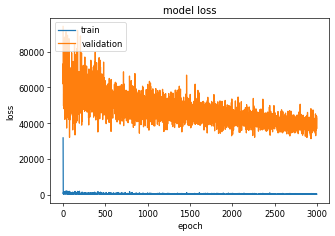

In [41]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

1/1 [==============================] - 0s 9ms/step
   Weight_gain  ANN Prediction
0     240.6300      242.221756
1     563.2600      557.606201
2     117.9315      122.182747
3      12.1500       11.913730
4     118.0800      118.646851
5      12.0800       11.888666
6     188.1200      191.403656
7      35.0800       34.323101


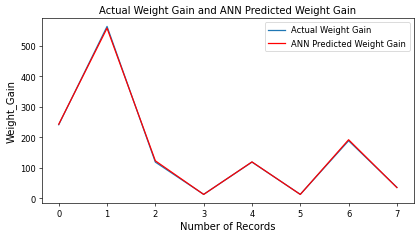

In [43]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()